In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import manifold, datasets
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics.pairwise import euclidean_distances
import mdtraj as md

In [3]:
%matplotlib inline

# Calmodulin

### Import Data

In [138]:
base = 'C:\\Users\\minch_000\\Documents\\TJ_data'

In [171]:
X_apo = np.loadtxt(base + '\\apo_calmodulin\sim_datasets\\raw_angle_5000.csv', delimiter=',')
X_holo = np.loadtxt(base + r'\holo_calmodulin\sim_datasets\raw_angle.csv', delimiter=',')

In [172]:
# Change ratio
num_apo = 4000
num_holo = 50
X_apo = X_apo[0:num_apo, :]
X_holo = X_holo[0:num_holo, :]

In [173]:
# 0 means holo, 1 means apo
X_apo = np.concatenate([np.ones((X_apo.shape[0], 1)), X_apo], axis=1)
X_holo = np.concatenate([np.zeros((X_holo.shape[0], 1)), X_holo], axis=1)
X = np.concatenate([X_apo, X_holo], axis=0)

In [174]:
# Shuffle them
np.random.shuffle(X)
apo_indices = np.ndarray.flatten(np.argwhere(X[:, 0] == 1))
holo_indices = np.ndarray.flatten(np.argwhere(X[:, 0] == 0))

### Apply Spectral Embedding

In [176]:
# Nearest neighbors method
n_neighbors = 1200
n_components = 2
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)
se_pca = PCA(n_components=2)
X_se = se.fit_transform(X[:, 1:])
X_se_pca = se_pca.fit_transform(X_se)

C:\Users\minch_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\minch_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\minch_000\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


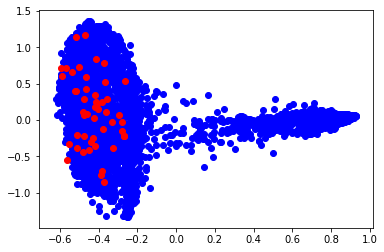

In [181]:
X_apo_se = X_se[apo_indices, :]
X_holo_se = X_se[holo_indices, :]
#plot_heatmap(X_apo_se)
plt.scatter(X_apo_se[:,0], X_apo_se[:,1], c='b')
plt.hold(True)
plt.scatter(X_holo_se[:,0], X_holo_se[:,1], c='r')

### Raw principal component analysis

In [179]:
pca = PCA(n_components=n_components)
X_pc = pca.fit_transform(X[:, 1:])

C:\Users\minch_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\minch_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\minch_000\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


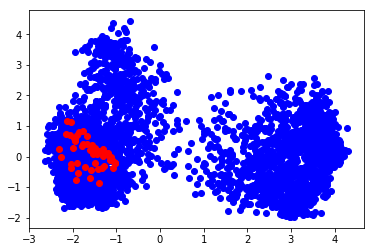

In [180]:
X_apo_pc = X_pc[apo_indices, :]
X_holo_pc = X_pc[holo_indices, :]
#plot_heatmap(X_apo_pc)
plt.scatter(X_apo_pc[:,0], X_apo_pc[:,1], c='b')
plt.hold(True)
plt.scatter(X_holo_pc[:,0], X_holo_se[:,1], c='r')

In [165]:
def plot_heatmap(X_se):
    x = X_se[:,0]
    y = X_se[:,1]
    xedges, yedges = np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10)
    hist, xedges, yedges = np.histogram2d(X_se[:,0],X_se[:,1],(xedges, yedges))
    hist = np.log(hist)
    xidx = np.clip(np.digitize(X_se[:,0], xedges), 0, hist.shape[0]-1)
    yidx = np.clip(np.digitize(X_se[:,1], yedges), 0, hist.shape[1]-1)
    c = hist[xidx, yidx]
    plt.scatter(X_se[:,0], X_se[:,1], c=c, edgecolor='none')
    cb = plt.colorbar()
    cb.set_label('log10(N)')

In [183]:
test = np.loadtxt(base + r'\apo_calmodulin\sim_datasets\raw_XYZ_10000.csv', delimiter=',')

In [185]:
test = test[:300, :]

In [187]:
test.shape[1]/3

1043.0

In [188]:
traj = np.reshape(test, (test.shape[0], int(test.shape[1]/3), 3))

In [189]:
# Save first SE Dimension video
md.Trajectory(traj, md.load(base + r'\apo_calmodulin\1cfd_protein.pdb').topology)

<mdtraj.Trajectory with 300 frames, 1043 atoms, 67 residues, without unitcells at 0x1e063de5cc0>

In [190]:
a = np.array([2.0, 3.0])

In [193]:
a.astype(int)

array([2, 3])